# Matplotlib简介

在 Python 中，可以用 **matplotlib** 画图。在使用前可以使用 (sudo) `pip install matplotlib` 安装。

限于篇幅，我们无法详尽地介绍 **Matplot** 的用法，仅通过一些实例让诸位感受一下 **Matplot** 画图的几个思想和语法。

在使用 **Matplotlib** 时，如果不知道某个图该怎么画，查看文档可能是最简单的方法，其官网： https://matplotlib.org 上提供了非常详细的示例、文档。此外， https://github.com/rougier/matplotlib-tutorial 也提供了一个非常好的教程，可以参阅。

# 实例1：数据的直方图以及散点图

在接下来的例子中看我们随机生成了一组期望为 0，方差为 2，包含 500 个观察值的随机数，并画出其直方图：

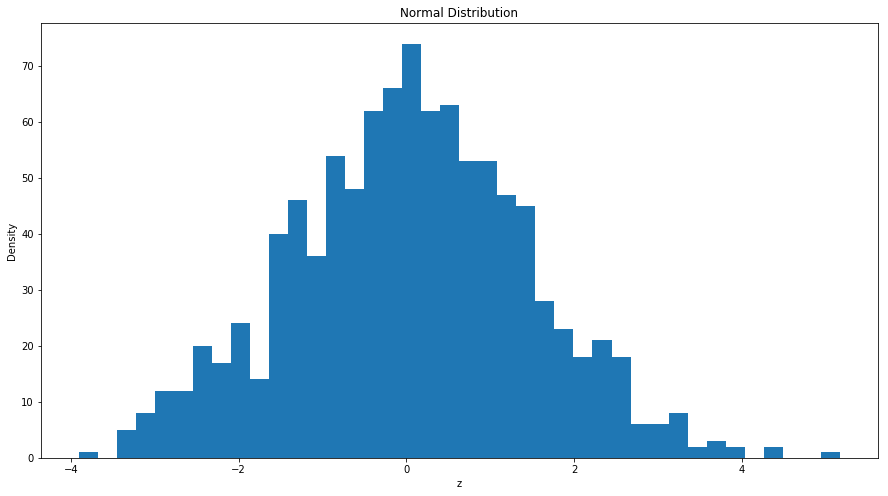

In [22]:
z=nprd.normal(0,np.sqrt(2),1000) ## 生成100个均值为0，方差为2的正态分布
## 导入matplotlib
import matplotlib.pyplot as plt 
## 使图形直接插入到jupyter中
%matplotlib inline
# 设定图像大小
plt.rcParams['figure.figsize'] = (15.0, 8.0)

plt.hist(z,bins=40) ##柱状图，40 个柱子
plt.xlabel('z')
plt.ylabel("Density")
plt.title('Normal Distribution')
plt.show() ## 画图

而以下代码，产生了 500 个 $x \sim N\left(0,2\right)$，以及 $y=x+u$，$u\sim N\left(0,1\right)$，并将其散点图、和关系图花在了同一张图上：

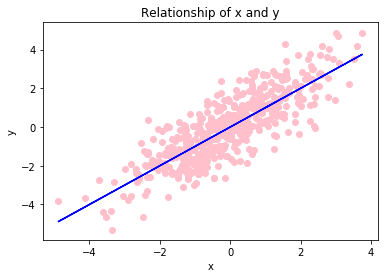

In [23]:
x=nprd.normal(0,np.sqrt(2),500) ## 生成100个均值为0，方差为2的正态分布
y=x+nprd.normal(0,1,500) ## y与x为线性关系
plt.scatter(x,y,color='pink') ##散点图
plt.plot(x,x,color='blue') ## 回归曲线
plt.xlabel('x')
plt.ylabel("y")
plt.title('Relationship of x and y')
plt.show() ## 画图

# 实例2：经验分布函数

在下面的例子中，我们使用分布函数逆函数的方法，产生了一系列的服从指数分布的随机数，进而计算其经验分布函数：$$\hat{F}\left(x\right)=\frac{1}{N}\sum_{i=1}^{N}{1\left\{x_i\leq x\right\}}$$

由于指数分布的分布函数为：$$F\left(x\right)=1-exp\left\{ -\frac{1}{b}x \right\}$$

从而根据你分布函数法，给定一个b，通过均匀分布u产生指数分布的随机数的公式为：$$x=-b\cdot \log\left(u\right)$$

接下来，我们使用matplotlib将李璐的分布函数和计算的经验分布函数画在了图上。

 x  | 分布函数| 经验分布函数| 差的绝对值
0.1 |0.03278 | 0.03500  | 0.00222
0.3 |0.09516 | 0.07500  | 0.02016
0.5 |0.15352 | 0.12000  | 0.03352
0.7 |0.20811 | 0.18000  | 0.02811
0.9 |0.25918 | 0.21500  | 0.04418
1.1 |0.30696 | 0.25000  | 0.05696
1.3 |0.35166 | 0.31000  | 0.04166
1.5 |0.39347 | 0.37000  | 0.02347
1.7 |0.43259 | 0.41500  | 0.01759
1.9 |0.46918 | 0.46500  | 0.00418
2.1 |0.50341 | 0.50000  | 0.00341
2.3 |0.53544 | 0.53000  | 0.00544
2.5 |0.56540 | 0.55500  | 0.01040
2.7 |0.59343 | 0.59500  | 0.00157
2.9 |0.61965 | 0.61500  | 0.00465
3.1 |0.64418 | 0.64000  | 0.00418
3.3 |0.66713 | 0.66500  | 0.00213
3.5 |0.68860 | 0.69500  | 0.00640
3.7 |0.70868 | 0.70500  | 0.00368
3.9 |0.72747 | 0.75000  | 0.02253
4.1 |0.74504 | 0.76500  | 0.01996
4.3 |0.76149 | 0.77000  | 0.00851
4.5 |0.77687 | 0.78000  | 0.00313
4.7 |0.79126 | 0.80000  | 0.00874
4.9 |0.80472 | 0.81000  | 0.00528
5.1 |0.81732 | 0.81500  | 0.00232
5.3 |0.82910 | 0.82500  | 0.00410
5.5 |0.84012 | 0.83500  | 0.00512
5.7 |0.85043 | 0.83500

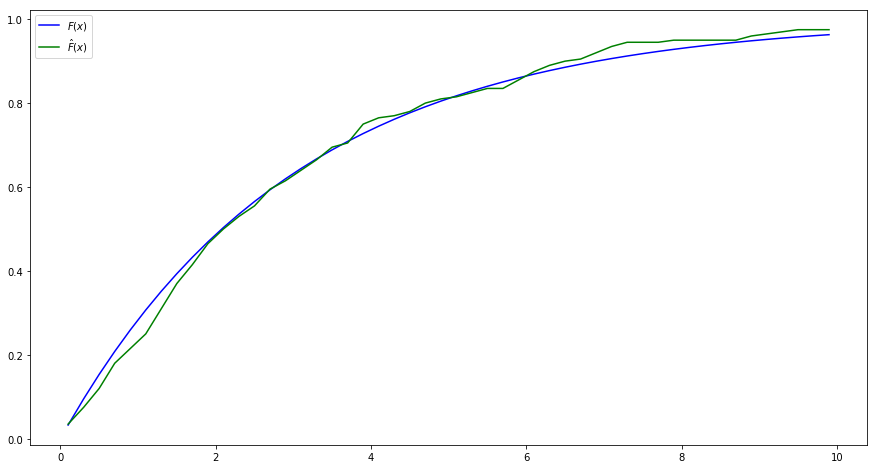

In [24]:
import numpy as np
import numpy.random as nprd

## 设定参数

b=3 #指数分布参数
N=200 #样本容量

## 生成N个x~F(x)=1-exp{-(1/b)*x}
X=-b*np.log(nprd.random(N))

## 给定一些点，在这些点上计算分布函数和经验分布函数
x=np.linspace(0.1,9.9,50) #0.1,0.3,...,9.9

## 计算理论的分布函数
F=1-np.exp((-1/b)*x)

## 计算经验分布函数

empirical_F=lambda s: np.sum(X<=s)/N # lambda表达式，定义了s点处的经验分布函数
F_hat=np.array(list(map(empirical_F,x))) # 计算x的所有点的经验分布函数

## 计算经验分布函数与真实的分布函数之间的绝对差异
bias=np.abs(F-F_hat)
## 打印两个分布函数及其绝对差异，以及平均的绝对差异
print(" x  | 分布函数| 经验分布函数| 差的绝对值")
for i in range(50):
    print("%.1f |%.5f | %.5f  | %.5f" % (x[i],F[i],F_hat[i],bias[i]))
print("Mean absolute bias:",np.sum(bias)/50)

## 导入matplotlib
import matplotlib.pyplot as plt 
## 使图形直接插入到jupyter中
%matplotlib inline
# 设定图像大小
plt.rcParams['figure.figsize'] = (15.0, 8.0)

plt.plot(x,F,label=r'$F(x)$',color='blue') ## 画出理论的分布函数
plt.plot(x,F_hat,label=r'$\hat{F}(x)$',color='green') ## 画出经验分布函数
plt.legend(loc='upper left', frameon=True)
plt.show() ## 画图

# 实例3：停止的鞅

现在考虑这么一个问题：如果我有 100 块钱，现在可以进行赌博，每次以 0.5 的概率赚一块钱，以 0.5 的概率赔一块钱，赚到 130 块我就收手，那么我的财富应该会如何变化？以下的程序模拟了这个问题：

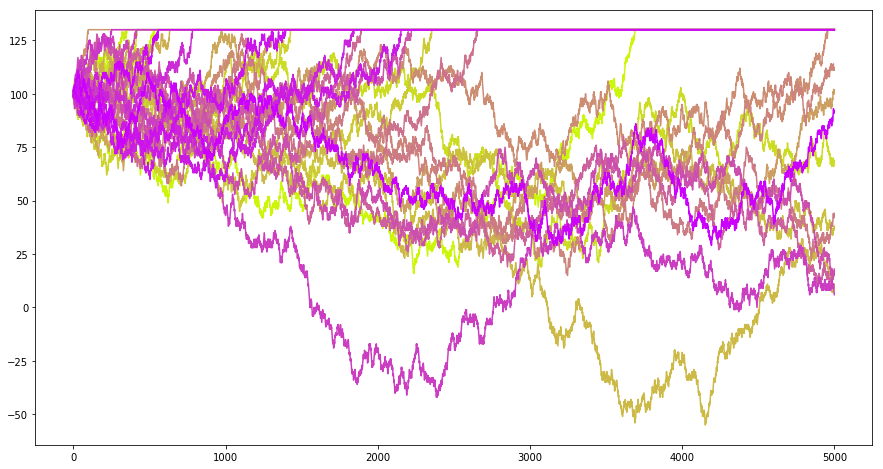

In [25]:
import numpy as np
import numpy.random as nprd

T=5000
x0=100
def gen_martingale():
    X=[]
    x=x0
    for t in range(T):
        if x>=130:
            x=x
        else:
            x=x+(1 if nprd.uniform()>0.5 else -1)
        X.append(x)
    return X
        
import matplotlib.pyplot as plt
%matplotlib inline
# 设定图像大小
plt.rcParams['figure.figsize'] = (15.0, 8.0)
N=30
t=[t for t in range(T)]
corlors=np.linspace(0,1,N)
for i in range(N):
    x=gen_martingale()
    plt.plot(t,x,color=(0.8,1-corlors[i],corlors[i]))
plt.show() ## 画图

# 实例4：大数定律和中心极限定理

我们知道，根据大数定律，样本均值会收敛到总体均值，即 $\bar{x}\rightarrow_p\mu$，以下代码通过产生 10000 个服从 0-1 分布的随机数（真实概率为0.5，比如抛硬币），计算了前 n 次的均值，并将其画在图上：

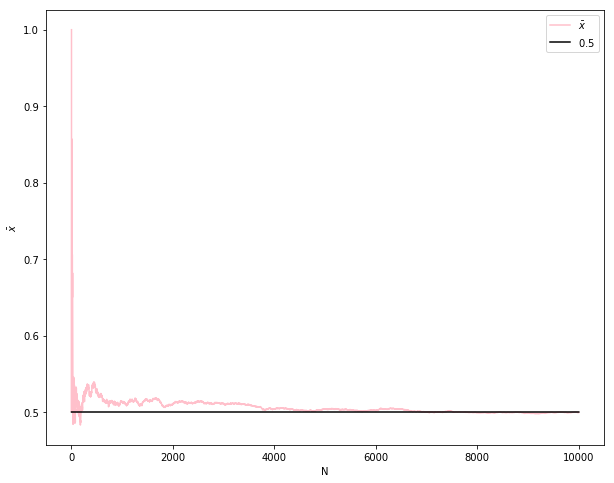

In [26]:
import numpy as np
from numpy import random as nprd

True_P=0.5

def sampling(N):
    ## 产生Bernouli样本
    x=nprd.rand(N)<True_P
    return x

M = 10000 #模拟次数
xbar = np.zeros(M)
N = np.array([i+1 for i in range(M)])
x = sampling(M)
for i in range(M):
    if i==0:
        xbar[i]=x[i]
    else:
        xbar[i]=(x[i]+xbar[i-1]*i)/(i+1)

## 导入matplotlib
import matplotlib.pyplot as plt 
## 使图形直接插入到jupyter中
%matplotlib inline
# 设定图像大小
plt.rcParams['figure.figsize'] = (10.0, 8.0)

plt.plot(N,xbar,label=r'$\bar{x}$',color='pink') ## xbar
xtrue=np.ones(M)*True_P
plt.plot(N,xtrue,label=r'$0.5$',color='black') ## true xbar
plt.xlabel('N')
plt.ylabel(r'$\bar{x}$')
plt.legend(loc='upper right', frameon=True)
plt.show() ## 画图

而根据中心极限定理，当样本量足够大时，样本均值服从正态分布：$\bar{x}\sim N\left(\mu,\sigma^2/N\right)$。以下代码，根据不同的样本量（$N$），分别产生一些混合正态分布（双峰的），并计算其均值，计算 2000 次样本均值，并观察给定样本量的条件下 2000 次样本均值的分布情况。最终将样本均值的分布情况绘制成图：

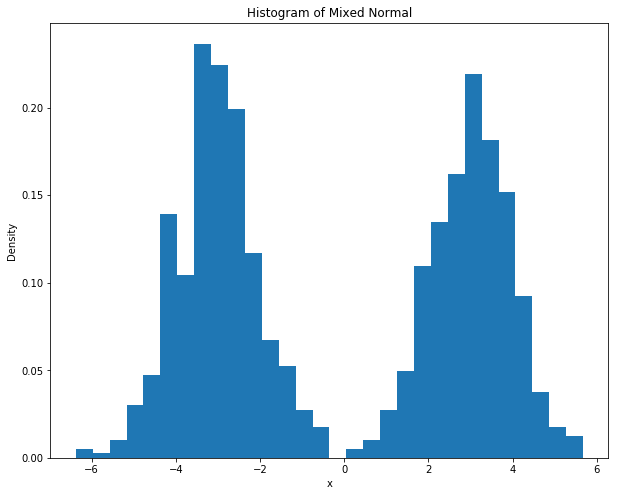

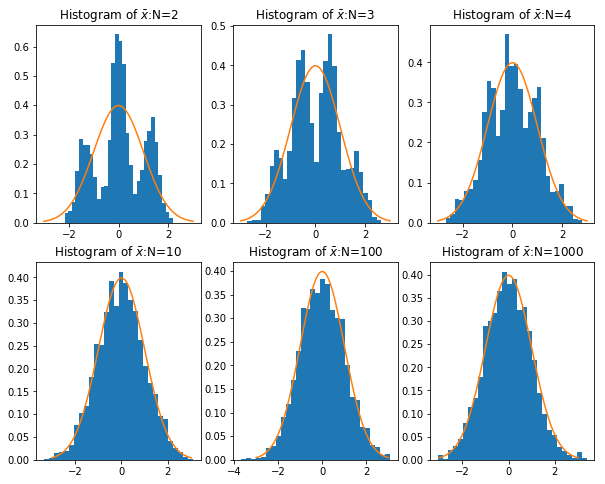

In [27]:
import numpy as np
from numpy import random as nprd

def sampling(N):
    ## 产生一组样本，以0.5的概率为z+3，0.5的概率为z-3，其中z~N(0,1)
    d=nprd.rand(N)<0.5
    z=nprd.randn(N)
    x=np.array([z[i]+3 if d[i] else z[i]-3 for i in range(N)])
    return x

N=[2,3,4,10,100,1000] # sample size
M=2000
MEANS=[]
for n in N:
    mean_x=np.zeros(M)
    for i in range(M):
        x=sampling(n)
        mean_x[i]=np.mean(x)/np.sqrt(10/n) ## 标准化，因为var(x)=10
    MEANS.append(mean_x)

## 导入matplotlib
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
## 使图形直接插入到jupyter中
%matplotlib inline
# 设定图像大小
plt.rcParams['figure.figsize'] = (10.0, 8.0)

x=sampling(1000)
plt.xlabel('x')
plt.ylabel('Density')
plt.title('Histogram of Mixed Normal')
plt.hist(x,bins=30,normed=1) ## histgram
plt.show() ## 画图

## 样本均值
ax1 = plt.subplot(2,3,1)
ax2 = plt.subplot(2,3,2)
ax3 = plt.subplot(2,3,3)
ax4 = plt.subplot(2,3,4)
ax5 = plt.subplot(2,3,5)
ax6 = plt.subplot(2,3,6)

## normal density
x=np.linspace(-3,3,100)
d=[1.0/np.sqrt(2*np.pi)*np.exp(-i**2/2) for i in x]

def plot_density(ax,data,N):
    ax.hist(data,bins=30,normed=1) ## histgram
    ax.plot(x,d)
    ax.set_title(r'Histogram of $\bar{x}$:N=%d' % N)

plot_density(ax1,MEANS[0],N[0])
plot_density(ax2,MEANS[1],N[1])
plot_density(ax3,MEANS[2],N[2])
plot_density(ax4,MEANS[3],N[3])
plot_density(ax5,MEANS[4],N[4])
plot_density(ax6,MEANS[5],N[5])


plt.show() ## 画图

# 实例5：Beta分布的矩估计

## 矩估计
 
如果 $x_i \sim Beta(\alpha, \beta)$，由于 $E(x_i)=\frac{\alpha}{\alpha + \beta}$，而 $E(x_i^2)=\frac{\alpha ^2}{(\alpha + \beta)^2}+\frac{\alpha \beta}{(\alpha + \beta)^2 (\alpha+\beta+1)}$，从而我们的矩估计即联立：

$$\frac{\hat{\alpha}}{\hat{\alpha} + \hat{\beta}}=\bar{x}$$ 

$$\frac{\hat{\alpha} ^2}{(\hat{\alpha} + \hat{\beta})^2}+\frac{\hat{\alpha} \hat{\beta}}{(\hat{\alpha} + \hat{\beta})^2 (\hat{\alpha}+\hat{\beta}+1)}=\overline{x^{2}}
$$ 

即可得到矩估计。在这里，我们将联立方程问题转化为一个最优化问题，即最小化： 

$$\min_{\hat{\alpha},\hat{\beta}}\left[\frac{\hat{\alpha}}{\hat{\alpha} + \hat{\beta}}-\bar{x} \right]^2+\left[\frac{\hat{\alpha} ^2}{(\hat{\alpha} + \hat{\beta})^2}+\frac{\hat{\alpha} \hat{\beta}}{(\hat{\alpha} + \hat{\beta})^2 (\hat{\alpha}+\hat{\beta}+1)}-\overline{x^{2}}\right]^2
$$

我们将会重复抽样、估计M=500次，并根据这500次的结果计算矩估计量的偏差（bias）、标准误(standard error)以及均方误差（mean sqrared error）。

Bias =  [ 0.04108888  0.01504609]
s.e. =  [ 0.34001766  0.10260341]
RMSE =  [ 0.34249132  0.10370075]


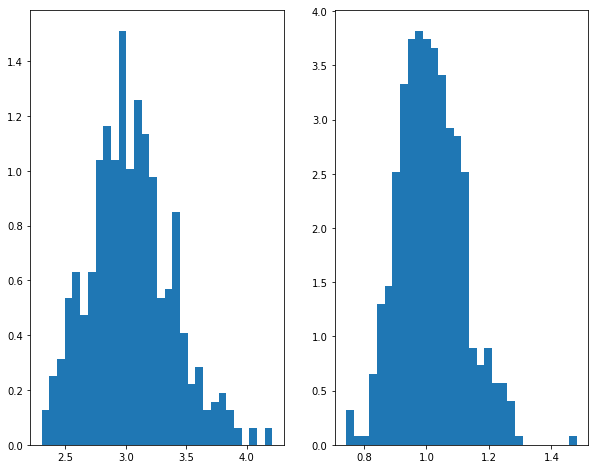

In [28]:
import numpy as np
from numpy import random as nprd
from scipy.optimize import minimize
import scipy as sc

def sampling(a,b,N):
    x=nprd.beta(a,b,N)
    return x

def estimate(x):
    meanx=np.mean(x)
    x2=[xi**2 for xi in x]
    meanx2=np.mean(x2)
    def obj(theta):
        return (theta[0]/(theta[0]+theta[1])-meanx)**2 + ((theta[0]/(theta[0]+theta[1]))**2+(theta[0]*theta[1])/((theta[0]+theta[1])**2*(theta[0]+theta[1]+1))-meanx2)**2
    res=minimize(obj, np.array([1,1]), method='nelder-mead', options={'xtol': 1e-4, 'disp': False})
    return res

M=500 ## simulation times
N=200 ## sample size
a=3
b=1 ## true value
RESULT=np.zeros((M,2), np.float64)
for m in range(M):
    x=sampling(a,b,N)
    res=estimate(x)
    RESULT[m]=res.x

MEAN_RESULT=np.average(RESULT, 0)
BIAS=MEAN_RESULT-np.array([a,b])
STD=np.std(RESULT, 0)
MSE2=np.array([i**2 for i in STD])+np.array([i**2 for i in BIAS])
MSE=np.array([np.sqrt(i) for i in MSE2])
print("Bias = ", BIAS)
print("s.e. = ", STD)
print("RMSE = ", MSE)

## 画图
import matplotlib.pyplot as plt
## 使图形直接插入到jupyter中
%matplotlib inline
# 设定图像大小
plt.rcParams['figure.figsize'] = (10.0, 8.0)
## 样本均值
ax1 = plt.subplot(1,2,1)
ax2 = plt.subplot(1,2,2)
ax1.hist(RESULT[:,0],bins=30,normed=1)
ax2.hist(RESULT[:,1],bins=30,normed=1)
plt.show()

## 极大似然估计

由于Beta分布的对数似然函数为$$\ln \left( \alpha, \beta | x \right)=\sum_{i=1}^N \left[ -\ln (Beta(\alpha,\beta))+(\alpha-1) \ln (x_i) + (\beta-1)\ln (1-x_i) \right]$$
最大化似然函数，或者最小化负的似然函数，即可得到极大似然估计。

Bias =  [ 0.05519612  0.01536957]
s.e. =  [ 0.32866097  0.09479056]
RMSE =  [ 0.33326362  0.09602851]


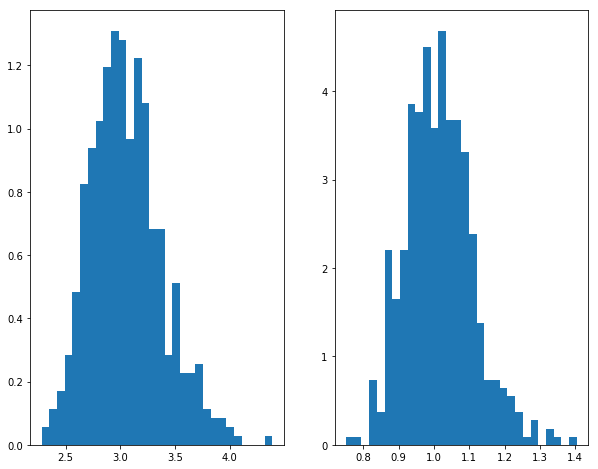

In [29]:
import numpy as np
from numpy import random as nprd
from scipy.optimize import minimize
import scipy as sc

def sampling(a,b,N):
    x=nprd.beta(a,b,N)
    return x
    
def estimate(x):
    def log_likelihood(theta):
        likeli=np.array([-1*np.log(sc.special.beta(theta[0],theta[1]))+(theta[0]-1)*np.log(xi)+(theta[1]-1)*np.log(1-xi) for xi in x])
        return -1*np.mean(likeli)
    res=minimize(log_likelihood, np.array([1,1]), method='nelder-mead', options={'xtol': 1e-4, 'disp': False})
    return res

M=500 ## simulation times
N=200 ## sample size
a=3
b=1 ## true value
RESULT=np.zeros((M,2), np.float64)
for m in range(M):
    x=sampling(a,b,N)
    res=estimate(x)
    RESULT[m]=res.x

MEAN_RESULT=np.average(RESULT, 0)
BIAS=MEAN_RESULT-np.array([a,b])
STD=np.std(RESULT, 0)
MSE2=np.array([i**2 for i in STD])+np.array([i**2 for i in BIAS])
MSE=np.array([np.sqrt(i) for i in MSE2])
print("Bias = ", BIAS)
print("s.e. = ", STD)
print("RMSE = ", MSE)

## 画图
import matplotlib.pyplot as plt
## 使图形直接插入到jupyter中
%matplotlib inline
# 设定图像大小
plt.rcParams['figure.figsize'] = (10.0, 8.0)
## 样本均值
ax1 = plt.subplot(1,2,1)
ax2 = plt.subplot(1,2,2)
ax1.hist(RESULT[:,0],bins=30,normed=1)
ax2.hist(RESULT[:,1],bins=30,normed=1)
plt.show()